In [1]:
import numpy as np
import pandas as pd
import zipfile
import gc
gc.enable()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Data_btp2/"
train=zipfile.ZipFile(path+"data_train"+".zip","r")
test=zipfile.ZipFile(path+"data_test"+".zip","r")

In [4]:
data_train = pd.read_csv(train.open('data_train.csv'))
data_test = pd.read_csv(test.open('data_test.csv'))



In [10]:
X = data_train.drop(['reordered', 'uxp_ratio_last_five'], axis=1)
y = data_train.reordered

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [12]:
del [data_train]
gc.collect()

78

In [5]:
from lightgbm import LGBMClassifier

In [7]:
pip install scikit-plot

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold,RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report
from scikitplot.metrics import plot_confusion_matrix
from scikitplot.classifiers import plot_feature_importances

In [13]:
hyperparameters = {
                  
                  "max_depth": [1,2,3,4,5,6,7,8,9,10],
                  "num_leaves":[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024],
                  "learning_rate":[0.0001, 0.001, 0.01, 0.1, 1.0]
                  }

LGB = LGBMClassifier(random_state=10)

randomizedsearch = RandomizedSearchCV(LGB, hyperparameters , n_iter=5,cv=10,scoring='f1',random_state=66 , verbose = 5)

model = randomizedsearch.fit(X_train,y_train)

print('mean test scores',model.cv_results_['mean_test_score'])
print(model.best_estimator_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] num_leaves=2, max_depth=3, learning_rate=0.0001 .................
[CV]  num_leaves=2, max_depth=3, learning_rate=0.0001, score=0.000, total=  39.3s
[CV] num_leaves=2, max_depth=3, learning_rate=0.0001 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.3s remaining:    0.0s


[CV]  num_leaves=2, max_depth=3, learning_rate=0.0001, score=0.000, total=  39.0s
[CV] num_leaves=2, max_depth=3, learning_rate=0.0001 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s


[CV]  num_leaves=2, max_depth=3, learning_rate=0.0001, score=0.000, total=  39.2s
[CV] num_leaves=2, max_depth=3, learning_rate=0.0001 .................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min remaining:    0.0s


[CV]  num_leaves=2, max_depth=3, learning_rate=0.0001, score=0.000, total=  42.5s
[CV] num_leaves=2, max_depth=3, learning_rate=0.0001 .................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.7min remaining:    0.0s


[CV]  num_leaves=2, max_depth=3, learning_rate=0.0001, score=0.000, total=  40.1s
[CV] num_leaves=2, max_depth=3, learning_rate=0.0001 .................
[CV]  num_leaves=2, max_depth=3, learning_rate=0.0001, score=0.000, total=  39.3s
[CV] num_leaves=2, max_depth=3, learning_rate=0.0001 .................
[CV]  num_leaves=2, max_depth=3, learning_rate=0.0001, score=0.000, total=  39.0s
[CV] num_leaves=2, max_depth=3, learning_rate=0.0001 .................
[CV]  num_leaves=2, max_depth=3, learning_rate=0.0001, score=0.000, total=  39.1s
[CV] num_leaves=2, max_depth=3, learning_rate=0.0001 .................
[CV]  num_leaves=2, max_depth=3, learning_rate=0.0001, score=0.000, total=  39.0s
[CV] num_leaves=2, max_depth=3, learning_rate=0.0001 .................
[CV]  num_leaves=2, max_depth=3, learning_rate=0.0001, score=0.000, total=  39.0s
[CV] num_leaves=128, max_depth=2, learning_rate=0.1 ..................
[CV]  num_leaves=128, max_depth=2, learning_rate=0.1, score=0.258, total=  45.0s
[

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 39.9min finished


mean test scores [0.         0.26042083 0.         0.         0.        ]
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=2,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=128, objective=None,
               random_state=10, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [15]:
clf = LGBMClassifier(max_depth=2, num_leaves=128, random_state=10)

clf.fit(X_train,y_train)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=2,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=128, objective=None,
               random_state=10, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [17]:
y_pred = (clf.predict_proba(X_test)[:, 1] >= 0.21).astype('int')

F1 Score: 0.42823977494048904
              precision    recall  f1-score   support

           0       0.91      0.94      0.93   2212941
           1       0.50      0.38      0.43    329458

    accuracy                           0.87   2542399
   macro avg       0.70      0.66      0.68   2542399
weighted avg       0.86      0.87      0.86   2542399



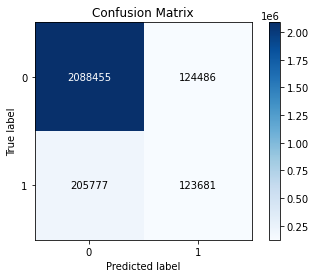

In [18]:
print('F1 Score: {}'.format(f1_score(y_pred, y_test)))
print(classification_report(y_pred, y_test))
plot_confusion_matrix(y_pred, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_feature_importances is deprecated; This will be removed in v0.4.0. Please use scikitplot.estimators.plot_feature_importances instead.
  warnings.warn(msg, category=FutureWarning)


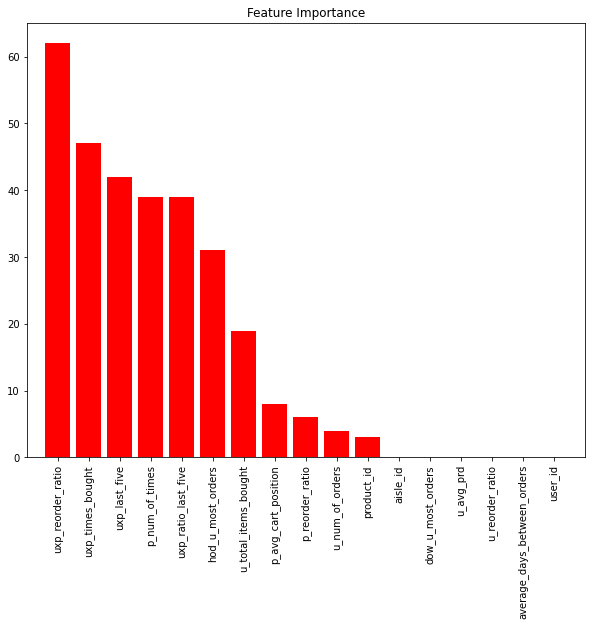

In [20]:
plot_feature_importances(clf, feature_names=data_test.columns, x_tick_rotation=90, max_num_features=20, figsize=(10,8))